In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/car-price-prediction-challenge/car_price_prediction.csv


In [2]:
#DATA VISUALIZATION
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
pd.options.mode.chained_assignment = None 
#ENCODING
import category_encoders as ce
from sklearn.preprocessing import LabelEncoder
#SCALING
from sklearn.preprocessing import StandardScaler
#Feature Selection:
from sklearn.feature_selection import VarianceThreshold
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
#ML
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
import xgboost as xg

In [3]:
#Metrics and Validation:
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

In [4]:
## loading the dataset...
cars=pd.read_csv("/kaggle/input/car-price-prediction-challenge/car_price_prediction.csv")

In [5]:
cars.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [6]:
cars.shape

(19237, 18)

In [7]:
#metadata of our dataset
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

**Data Cleaning:**

In [8]:
#number of null values in our dataset
cars.isnull().sum(axis=0)

ID                  0
Price               0
Levy                0
Manufacturer        0
Model               0
Prod. year          0
Category            0
Leather interior    0
Fuel type           0
Engine volume       0
Mileage             0
Cylinders           0
Gear box type       0
Drive wheels        0
Doors               0
Wheel               0
Color               0
Airbags             0
dtype: int64

In [9]:
#dropping duplicates
ncars=cars.drop_duplicates(keep=False)

In [10]:
#shape of our new dataset
ncars.shape

(18704, 18)

In [11]:
ncars.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4
5,45802912,39493,891,HYUNDAI,Santa FE,2016,Jeep,Yes,Diesel,2,160931 km,4.0,Automatic,Front,04-May,Left wheel,White,4


In [12]:
ncars.Levy.dtype

dtype('O')

In [13]:
#In Levy column,hyphens are replaced with zeroes
ncars.Levy=ncars.Levy.str.replace('-','0')

In [14]:
#obj->int
ncars.Levy=ncars.Levy.astype('int64')

In [15]:
ncars.Levy

0        1399
2           0
3         862
4         446
5         891
         ... 
19232       0
19233     831
19234     836
19235    1288
19236     753
Name: Levy, Length: 18704, dtype: int64

In [16]:
#as Mileage is a factor, removing "km" from it helps in improvising the prediction
ncars.Mileage.head()

0    186005 km
2    200000 km
3    168966 km
4     91901 km
5    160931 km
Name: Mileage, dtype: object

In [17]:
#we have to drop the km 
ncars.Mileage=ncars.Mileage.apply(lambda x:str(x).replace("km"," "))
#converting into int
ncars.Mileage=ncars.Mileage.apply(lambda x:int(x))

In [18]:
ncars.Mileage

0        186005
2        200000
3        168966
4         91901
5        160931
          ...  
19232    300000
19233    161600
19234    116365
19235     51258
19236    186923
Name: Mileage, Length: 18704, dtype: int64

In [19]:
#Doors have mixed datatype with both strings and integers
ncars.Doors.head()

0    04-May
2    04-May
3    04-May
4    04-May
5    04-May
Name: Doors, dtype: object

In [20]:
ncars.Doors.unique()

array(['04-May', '02-Mar', '>5'], dtype=object)

In [21]:
#converting the Doors field in more readable form
ncars.Doors=ncars.Doors.str.replace('04-May','4-5').replace('02-Mar','2-3')

In [22]:
ncars.Doors.unique()

array(['4-5', '2-3', '>5'], dtype=object)

In [23]:
ncars['Engine volume']

0              3.5
2              1.3
3              2.5
4              1.3
5                2
           ...    
19232    2.0 Turbo
19233          2.4
19234            2
19235            2
19236          2.4
Name: Engine volume, Length: 18704, dtype: object

In [24]:
#removing "Turbo" from this field
ncars['Engine volume']=ncars['Engine volume'].str.replace(r'([a-z,' ',A-Z])','').astype('f')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


In [25]:
ncars['Engine volume']

0        3.5
2        1.3
3        2.5
4        1.3
5        2.0
        ... 
19232    2.0
19233    2.4
19234    2.0
19235    2.0
19236    2.4
Name: Engine volume, Length: 18704, dtype: float32

In [26]:
#making the following fields object data type. Why? Because, it doesn't much predict the price of the car imo
ncars.Airbags=ncars.Airbags.astype('O')

In [27]:
ncars['Cylinders']=ncars['Cylinders'].astype('O')

In [28]:
ncars['Prod. year']=ncars['Prod. year'].astype('O')

In [29]:
ncars.describe()

,ID,Price,Levy,Engine volume,Mileage
count,1.870400e+04,1.870400e+04,18704.000000,18704.000000,1.870400e+04
mean,4.557522e+07,1.860236e+04,632.444985,2.305742,1.572059e+06
std,9.363561e+05,1.932520e+05,569.018150,0.877472,4.908815e+07
min,2.074688e+07,1.000000e+00,0.000000,0.000000,0.000000e+00
25%,4.569182e+07,5.331000e+03,0.000000,1.800000,7.030300e+04
50%,4.577164e+07,1.317200e+04,642.000000,2.000000,1.266900e+05
75%,4.580162e+07,2.200000e+04,915.000000,2.500000,1.895300e+05
max,4.581665e+07,2.630750e+07,11714.000000,20.000000,2.147484e+09


In [30]:
ncars.columns

Index(['ID', 'Price', 'Levy', 'Manufacturer', 'Model', 'Prod. year',
       'Category', 'Leather interior', 'Fuel type', 'Engine volume', 'Mileage',
       'Cylinders', 'Gear box type', 'Drive wheels', 'Doors', 'Wheel', 'Color',
       'Airbags'],
      dtype='object')

In [31]:
cat_col = list(cars.select_dtypes('O').columns)
num_col = list(cars.select_dtypes(np.number).columns)

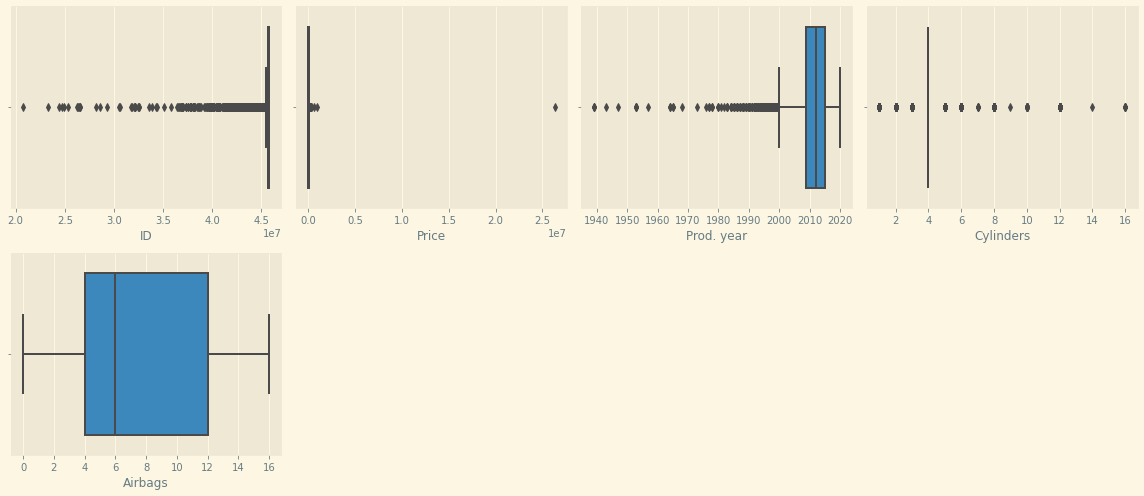

In [32]:
plt.style.use('Solarize_Light2')
plt.figure(figsize=[16,7])
for i,j in enumerate(num_col):
    plt.subplot(2,4,i+1)
    sns.boxplot(x=ncars[j])
    plt.tight_layout()
plt.show()

In [33]:
ccars=ncars.copy()

In [34]:
q1=ccars.quantile(0.25)
q3=ccars.quantile(0.75)
iqr=q3-q1

In [35]:
ccars = ccars[~(((ccars>q3+3*iqr) | (ccars<q1-3*iqr)).any(axis=1))]

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  """Entry point for launching an IPython kernel.


In [36]:
len(ccars)

16189

In [37]:
len(ncars)

18704

In [38]:
cat_col = list(ccars.select_dtypes('O').columns)
num_col = list(ccars.select_dtypes(np.number).columns)

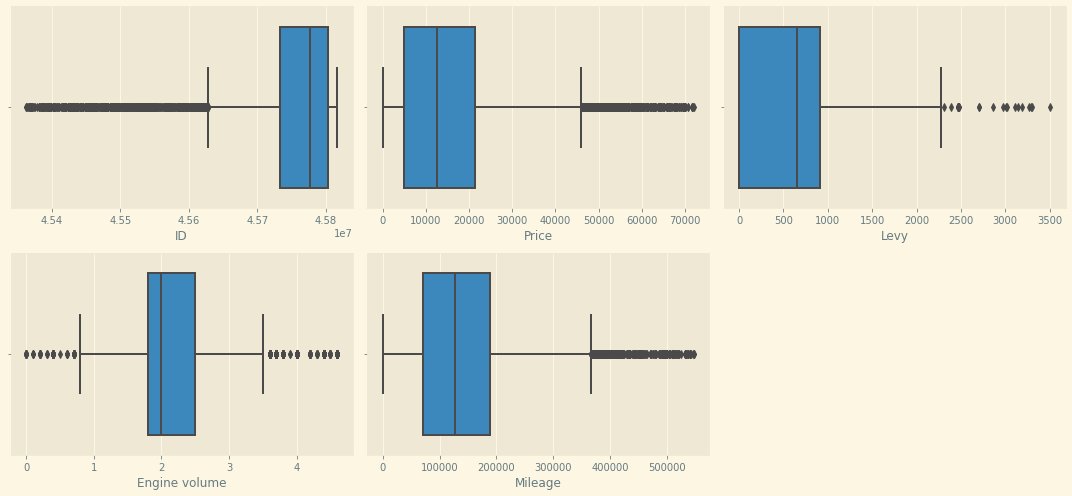

In [39]:
plt.style.use('Solarize_Light2')
plt.figure(figsize=[15,7])
for i,j in enumerate(num_col):
    plt.subplot(2,3,i+1)
    sns.boxplot(x=ccars[j])
    plt.tight_layout()
plt.show()

In [40]:
#Does ID is necessary for us to predict the price? No! So we are free to drop it from numerical columns
num_col.remove('ID')
ccars.drop(columns='ID',inplace=True)

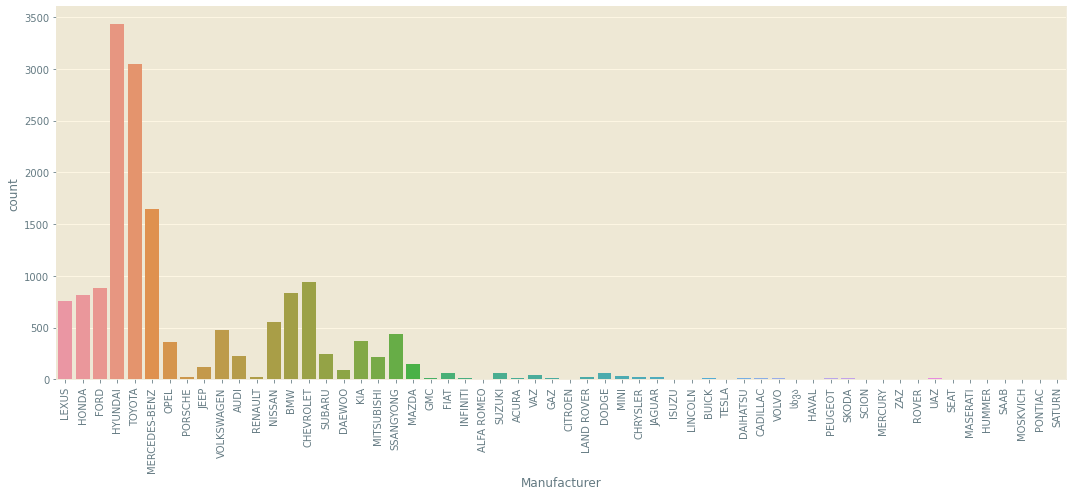

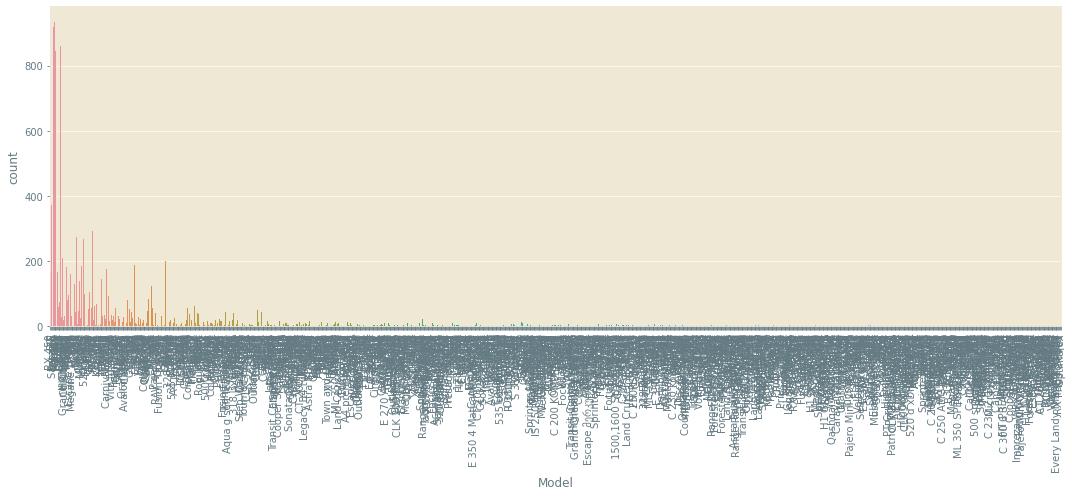

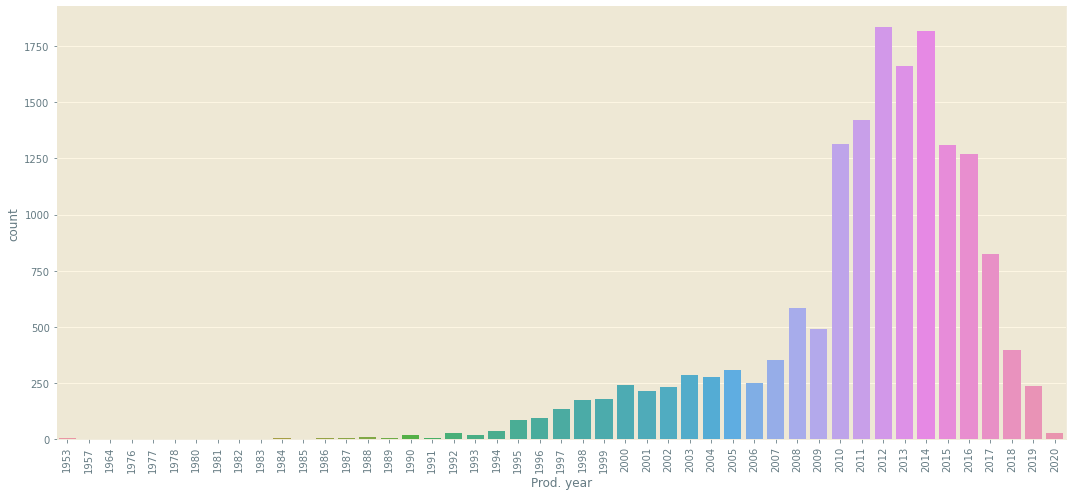

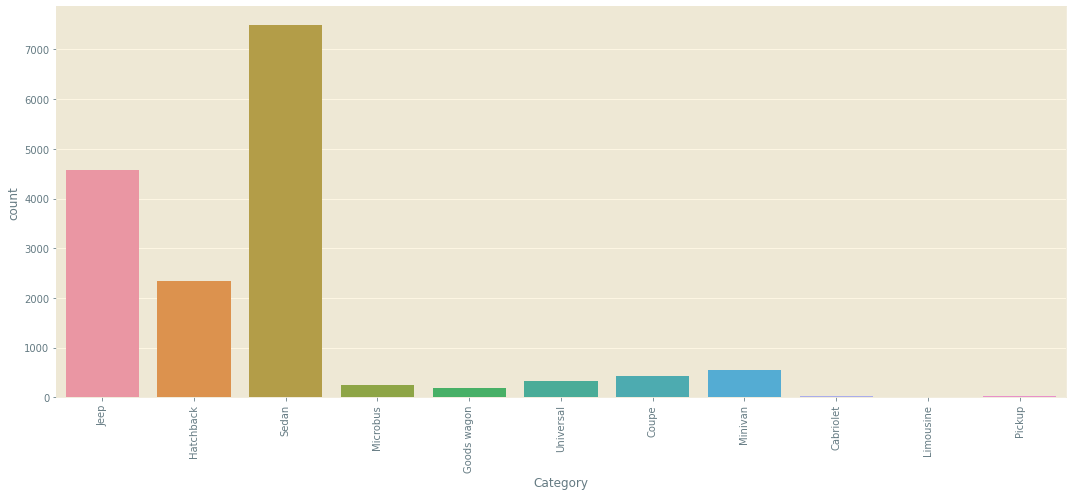

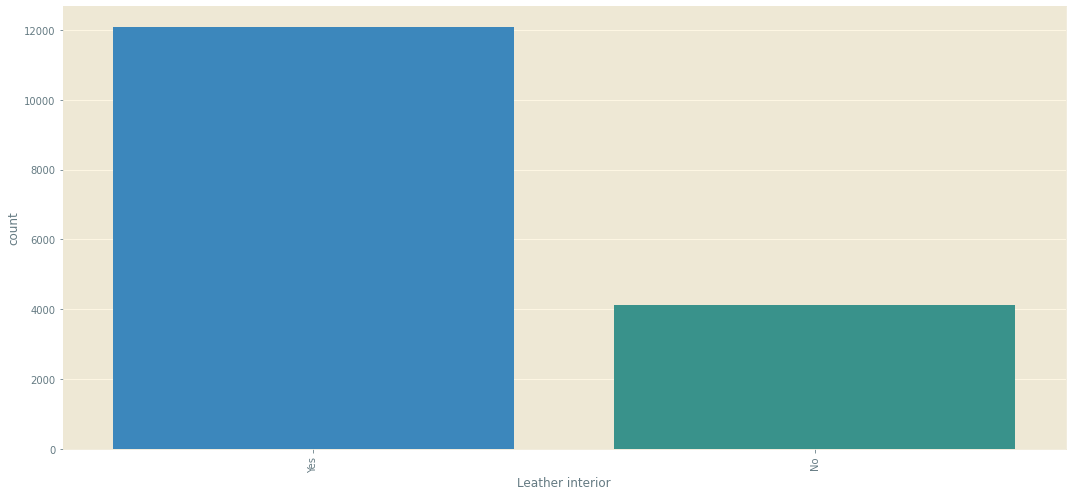

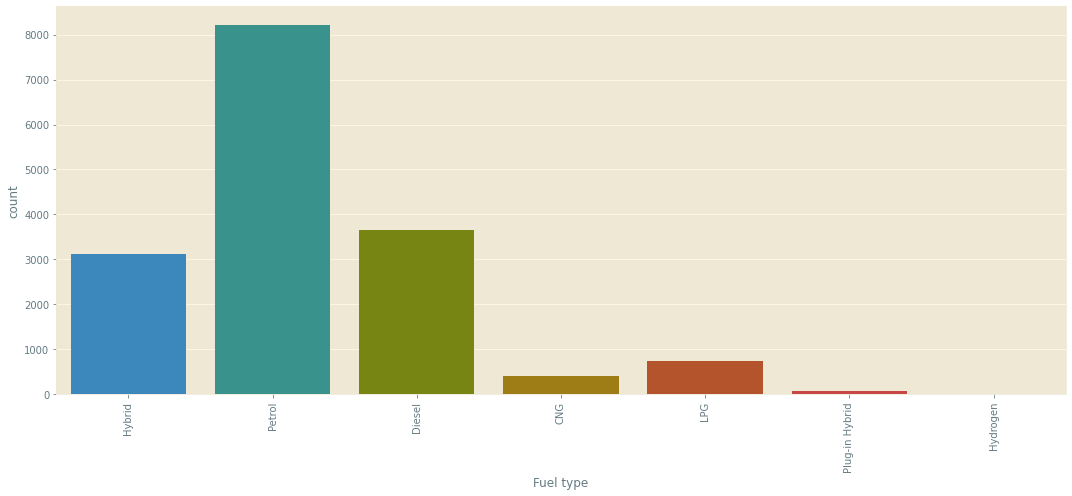

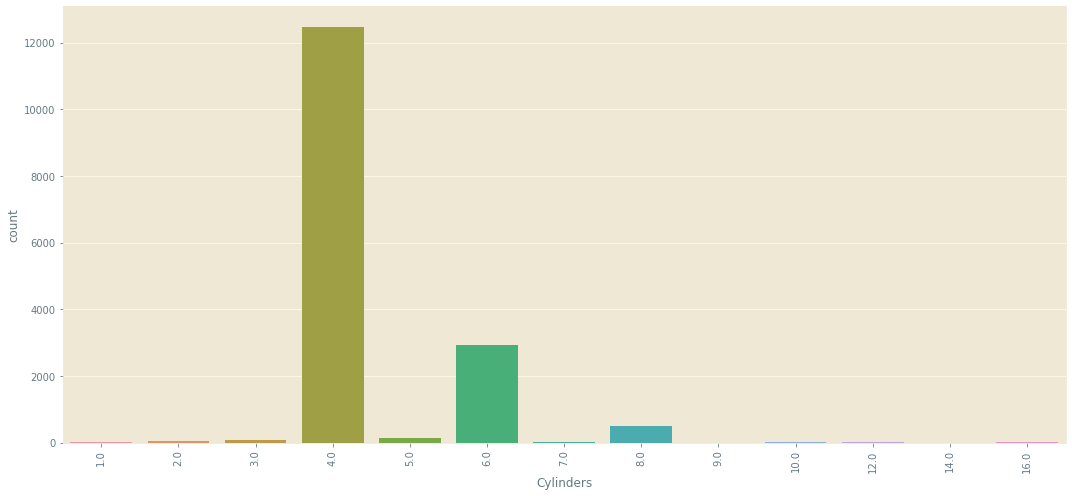

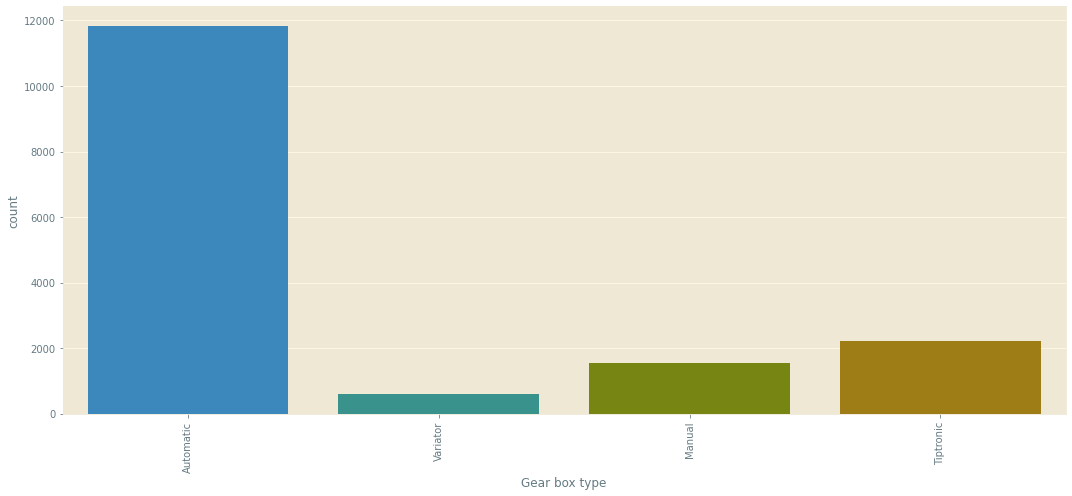

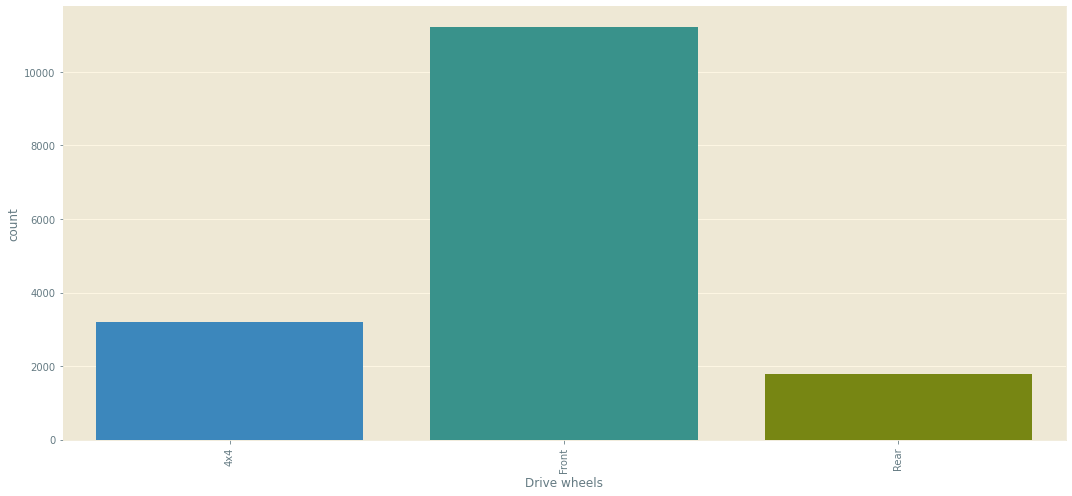

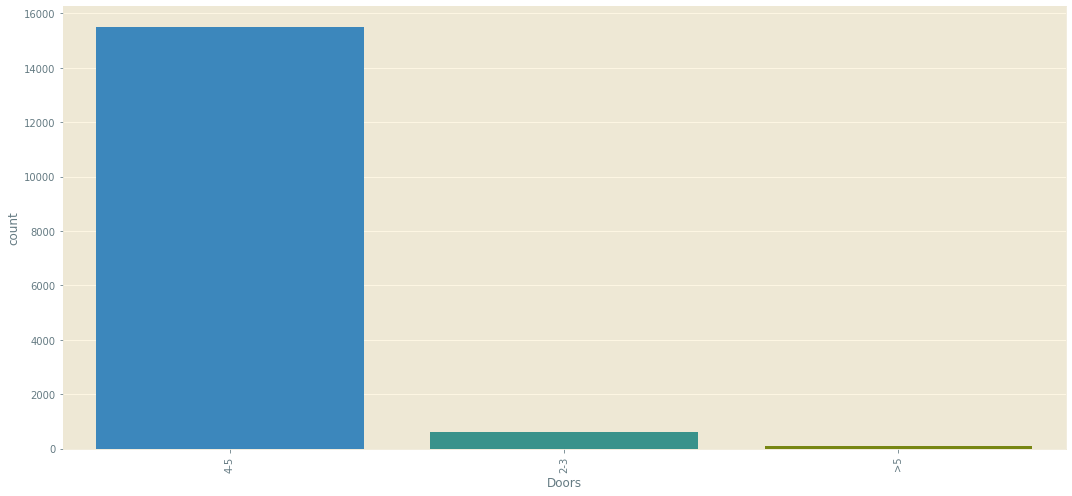

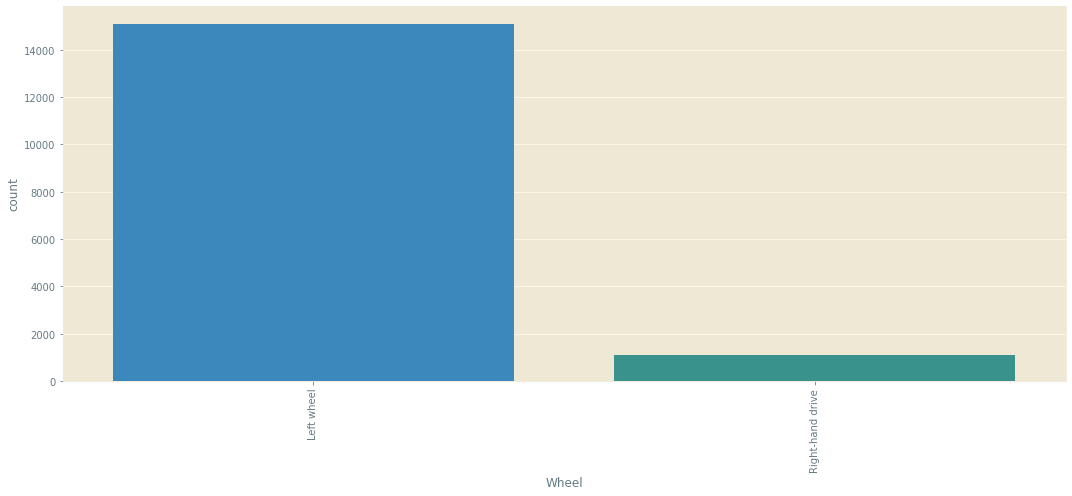

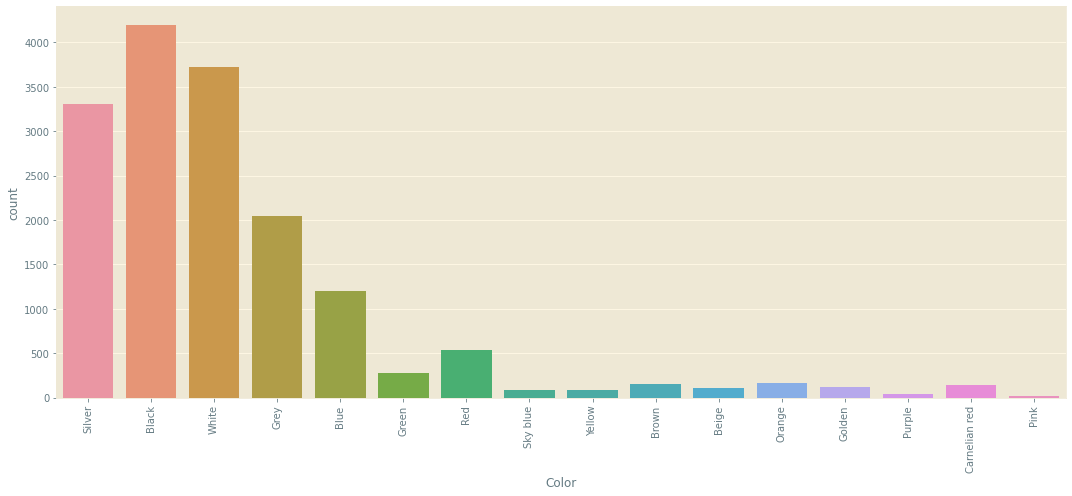

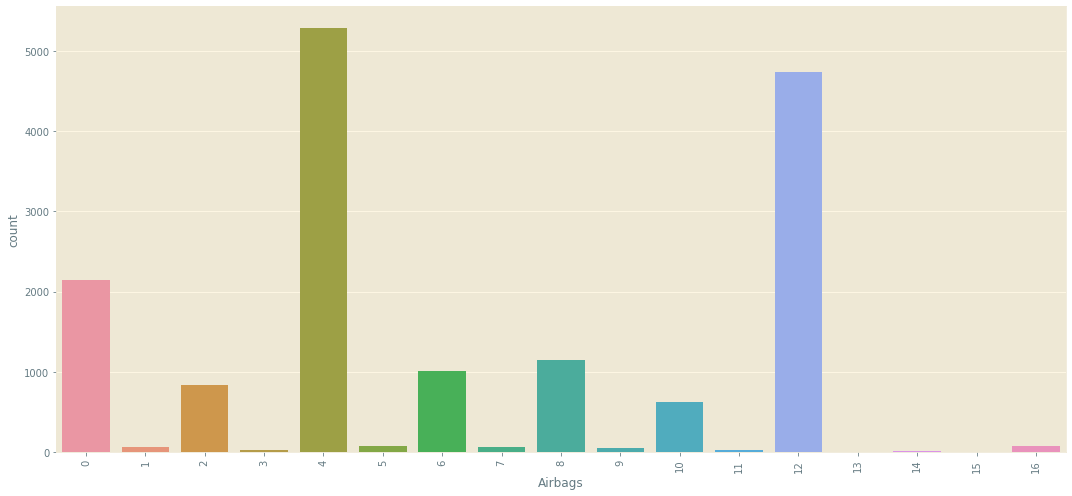

In [41]:
%matplotlib inline
for i in cat_col:
        plt.figure(figsize=[15,7])
        sns.countplot(x=ccars[i])
        plt.xticks(rotation=90)
        plt.tight_layout()
        plt.show()

In [42]:
#To get an overview of which Category are preferred by each manufacturer
fig = px.treemap(data_frame=ccars,path=["Manufacturer","Category","Model"],title='MANUFACTURER WISE DATA DISTRIBUTION')
fig.show()

In [43]:
fig = px.treemap(data_frame=ccars,path=["Manufacturer","Category","Model"],values='Price',title='MANUFACTURER WISE TOTAL PRICE | SALES DISTRIBUTION')
fig.show()

In [44]:
#Insights:
#Brandwise Hyundai is the leading brand followed by Toyota and Mercedes Benz
#Among cars, Jeep and Sedan type cars are most preferred by customers
#Most customers wish to have leather interior for their cars
#Cars with four cylinders is favourable by the customers 
#Most preferred fuel type:Petrol
#Cars with left wheel are in higher demand
#Most preferred drive wheel:front
#Most preferred Gear type:Automatic
#Most preferred Color:Silver,White,Grey,Black

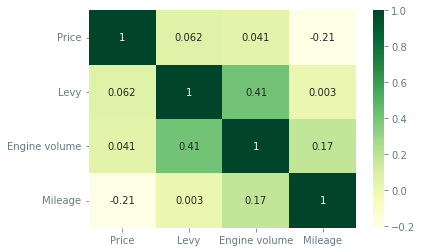

In [45]:
sns.heatmap(data=ccars.corr(),cmap='YlGn',annot=True)
plt.show()

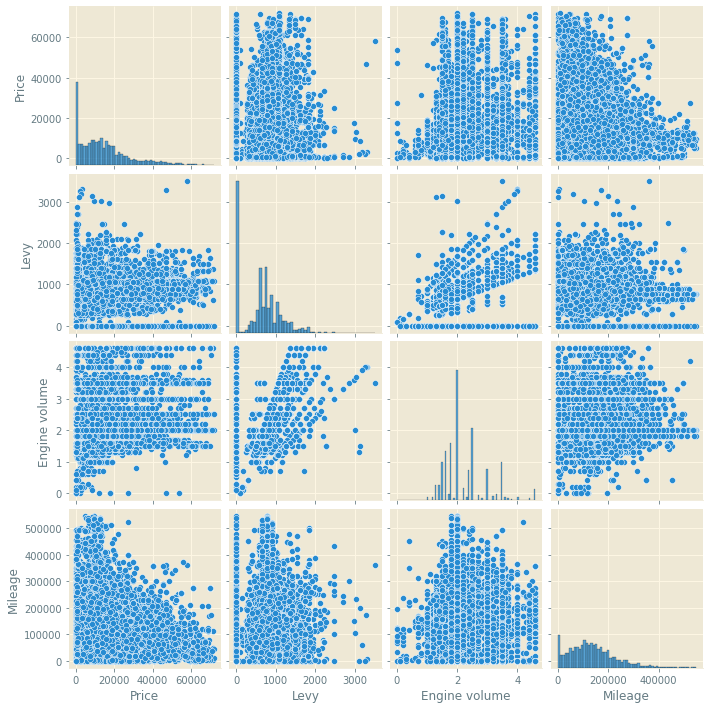

In [46]:
sns.pairplot(ccars[num_col])
plt.show()

There is not much relation between any two fields from observing from the pairplot

In [47]:
for i in cat_col:
    if len(cars[i].unique())<25:
        boxp = px.box(data_frame=ccars,x=i,y='Price')
        boxp.show()

In [48]:
len(cars.Model.unique())

1590

Models are so large in number so we are neglecting it in boxplots

In [49]:
#Train-Test-Split
X=ccars.copy()
X.drop(columns='Price',inplace=True)
y=ccars['Price']

In [50]:
X_train , X_test , y_train , y_test = train_test_split(X,y,random_state=1,test_size=0.3)

In [51]:
#Encoding

In [52]:
#Making production years are unique categorical values
yrs = list(X['Prod. year'].sort_values().unique())
mapuni = {j:i for i,j in enumerate(yrs)}

In [53]:
#We are going to use three types of encoding in our dataset:Ordinal,Binary Encoded,Binary
#Fields like 'Manufacturer','Category' are having categorical values. So, it is Binary encoded.
#Fields like 'Year' are kept ordinal in our dataset
#Some fields like 'Leather interior','Wheel' have binary variables like Yes/No - we can make it binary [eg:Yes:1 No:0]
#Fields like 'Cylinders','Airbags' are considered as it is

In [54]:
#Binary encoding our categorical variables;drop_invariant is set to False because it leads to loss of accuracy in our prediction
ec = ce.BinaryEncoder(cols=['Manufacturer','Model','Category','Fuel type','Gear box type','Drive wheels','Color'],drop_invariant=False,return_df=True)
X_train_ec = ec.fit_transform(X=X_train)
X_test_ec = ec.transform(X=X_test)

In [55]:
#Binary Encoding the categorical variables
X_train_ec['Prod. year'] = X_train_ec['Prod. year'].replace(mapuni)
X_test_ec['Prod. year'] = X_test_ec['Prod. year'].replace(mapuni)
X_train_ec['Doors'] = X_train_ec['Doors'].replace({'2-3':0,'4-5':1,'>5':2})
X_test_ec['Doors'] = X_test_ec['Doors'].replace({'2-3':0,'4-5':1,'>5':2})
X_train_ec['Leather interior'] = X_train_ec['Leather interior'].replace({'Yes':1,'No':0})
X_test_ec['Leather interior'] = X_test_ec['Leather interior'].replace({'Yes':1,'No':0})
X_train_ec['Wheel'] = X_train_ec['Wheel'].replace({'Left wheel':1,'Right-hand drive':0})
X_test_ec['Wheel'] = X_test_ec['Wheel'].replace({'Left wheel':1,'Right-hand drive':0})

In [56]:
X_train_ec['Cylinders'],X_train_ec['Airbags'] = X_train_ec['Cylinders'].astype('i'),X_train_ec['Airbags'].astype('i')
X_test_ec['Cylinders'],X_test_ec['Airbags'] = X_test_ec['Cylinders'].astype('i'),X_test_ec['Airbags'].astype('i')

In [57]:
# ML MODEL BUILDING & EVALUTATION

In [58]:
# Base XGBRegressor

In [59]:
baseXGB = xg.XGBRegressor(n_estimators=100,booster='gbtree',random_state=10)

In [60]:
baseXGB.fit(X_train_ec,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=10,
             reg_alpha=0, reg_lambda=1, ...)

In [61]:
y_train_pre_baseXGB = baseXGB.predict(X_train_ec)
y_test_pre_baseXGB = baseXGB.predict(X_test_ec)

In [62]:
Train_rsq_baseXGB = r2_score(y_train,y_train_pre_baseXGB)
print("Train R-square associated with Base XG Boost Regression is : ", Train_rsq_baseXGB,'\n')

Test_rsq_baseXGB = r2_score(y_test , y_test_pre_baseXGB)
print("Test R-square associated with Base XG Boost Regression is : ", Test_rsq_baseXGB,'\n')


print("Test RMS_error:", np.sqrt(mean_squared_error(y_test , y_test_pre_baseXGB)),'\n')

print("Test Mean absolute error: ",mean_absolute_error(y_test , y_test_pre_baseXGB),'\n')
      
print("Test Mean absolute percentage error: ", mean_absolute_percentage_error(y_test , y_test_pre_baseXGB),'\n')

Train R-square associated with Base XG Boost Regression is :  0.9186033063875917 

Test R-square associated with Base XG Boost Regression is :  0.7818726399697293 

Test RMS_error: 6476.612472659687 

Test Mean absolute error:  4017.39010869713 

Test Mean absolute percentage error:  10.47759906191537 



In [63]:
cv_score_baseXGB = cross_val_score(baseXGB,X_test_ec,y_test,cv=15,scoring='r2')
print('Test Scores:',cv_score_baseXGB)

print('Score Mean',cv_score_baseXGB.mean()*100, 'Score Standard Deviation', cv_score_baseXGB.std()*100)

Test Scores: [0.7400623  0.73257249 0.71964116 0.63151415 0.7312886  0.76028322
 0.73149682 0.76126073 0.6509405  0.76314088 0.74862723 0.75043699
 0.73201626 0.72076926 0.66258108]
Score Mean 72.24421115084353 Score Standard Deviation 3.9752540075126195
